---
# 프로젝트 명: 앙상블 기법을 활용한 보스톤 주택 가격 예측 (Boston House Prices)

보스톤 주택 가격과 관련된 데이터를 기반으로 주택 가격을 예측합니다.

## 데이터 출처: [Boston House Prices](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)
원본출처: [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

본 데이터셋은 `scikit-learn` 패키지의 `load_boston`을 활용하여 로드하는 데이터셋이며 원본 출처는 카네기 멜론 대학에서 운영하고 있는 **the StatLib library**에서 발췌하였습니다.

## 프로젝트 개요

데이터베이스의 각 레코드는 보스턴 교외 또는 도시를 설명합니다. 
여러분들은 주어진 **13개의 데이터 컬럼을 바탕으로 주택 가격을 예측**해야 합니다.
이 데이터는 1970 년 보스턴 표준 메트로폴리탄 통계 지역 (SMSA)에서 발췌 한 것입니다. 



## 프로젝트 목표
    1. 데이터 시각화를 통한 데이터 특성을 파악합니다.
    2. `pandas`, `numpy`, `scikit-learn` 패키지를 활용하여 데이터 가공, 전처리, 피처 공학(feature engineering)을 진행합니다.
    3. 회귀문제를 다루는 **머신러닝 앙상블 기법**을 활용하여 **보스톤 주택 가격 예측**을 진행합니다.
    4. 다양한 머신러닝 모델을 구현해보고, 보스톤 주택 가격 데이터셋으로 가격예측 모델을 만들어 성능을 비교 합니다.
    5. 각기 다른 모델을 활용하여 앙상블 모델을 구현 및 성능을 비교합니다.

## 프로젝트 구성
    * 데이터 로드 (load data)
    * 데이터 시각화 (visualization)
    * 데이터 전처리 (pre-processing)
    * 머신러닝 모델링 (개별 모델링)
    * 평가지표 생성 (evalutation)
    * Bagging, Boosting, Voting, Stacking 기법을 활용하여 앙상블 모델 완성

- 작성자: 이경록 감수자

---

### 데이터

**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

### 목표

1. 학습을 위한 train / 검증을 위한 test 셋으로 분리합니다.
2. 검증을 위한 평가지표를 만듭니다.
3. 단일 classifiction 모델로 baseline 예측 성능 획득: 가장 기본적인 classification 모델로 baseline 예측율을 얻습니다.
4. boosting 계열의 앙상블 모델을 활용하여 예측 성능을 측정합니다.
5. voting 계열의 앙상블 모델을 활용하여 예측 성능을 측정합니다.
5. bagging 계열의 앙상블 모델을 활용하여 예측 성능을 측정합니다.
4. 앙상블 모델과 앙상블 모델을 섞는 blending ensemble 기법을 적용합니다.
5. 모델을 쌓아올리는 stacking ensemble 기법을 적용합니다.

**출처**

- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## 데이터 셋 로드

In [1]:
from sklearn.datasets import load_boston

# 데이터셋 로드
boston = load_boston()

# 데이터셋의 description 출력
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# 랜덤 시드 고정
SEED = 34

* **X**: Feature 데이터 입니다.
* **Y**: 집 값이며, 우리가 예측할 Target 데이터 입니다.

In [3]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
Y = pd.Series(boston['target'])

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# 한글폰트 로딩
plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline

### 각 컬럼간의 상관관계를 확인합니다. 

* 0에 가까울 수록 상관관계가 없습니다.
* 1에 가까울 수록 비례관계를 갖습니다.
* -1에 가까울 수록 반비례관계를 갖습니다.

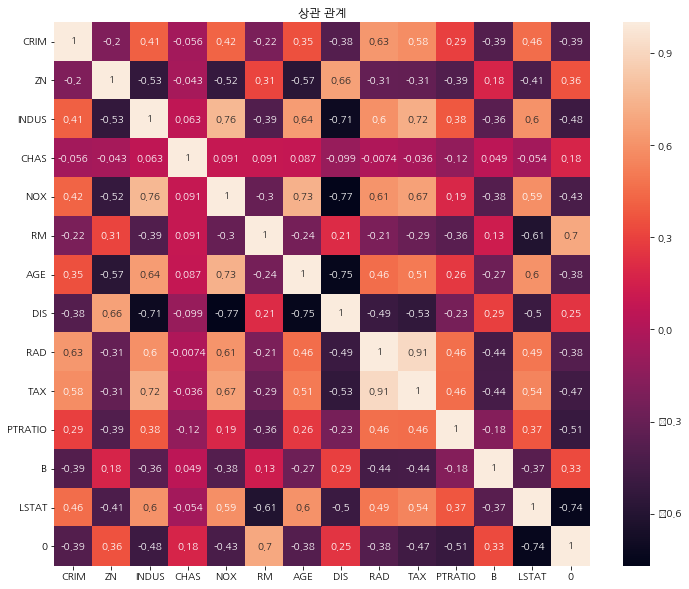

In [7]:
df = pd.concat([X, Y], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('상관 관계')
plt.show()

## 데이터 셋 분할 (train / test)

자세한 사항은 [train_test_split 모듈을 활용하여 학습과 테스트 세트 분리](https://teddylee777.github.io/machine-learning/keras-%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98%EC%99%80-metric-%EC%BB%A4%EC%8A%A4%ED%85%80%ED%95%98%EA%B8%B0)
를 참고해 보시기 바랍니다.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=SEED)
print(x_train.shape, x_test.shape)

(354, 14) (152, 14)


## 평가 지표 만들기

**아래 코드는 수정하지 않아도 됩니다.**

평가 지표를 활용하여 앞으로 진행될 실습에 대한 평가를 진행합니다.

prediction에 모델이 예측한 주택 가격을 넣으면, `Mean Squared Error`를 보여줍니다.

prediction에 `name` 인자에 알고리즘 이름을 넣어주면, 알아서 저장하여 모두 시각화하여 출력해 줍니다.

In [9]:
from sklearn.metrics import mean_squared_error

my_prediction = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

In [10]:
def evaluate_prediction(prediction, name='no_name'):
    global my_prediction
    global y_test
    global colors
    
    mse = mean_squared_error(prediction, y_test)    
    my_prediction[name] = mse
    y_value = sorted(my_prediction.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['algorithm', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['algorithm'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE 오차 (낮을 수록 좋습니다)', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

## Q1. 단일 회귀 모델을 활용하여 주택 가격 예측

scikit-learn 라이브러리를 활용하여 주택 가격 예측을 진행해보고, `evaluate_prediction`을 통해 시각화를 진행합니다.

** 과제 1 **
* `KNeighborsRegressor`를 활용하여 주택 가격을 예측합니다.
* **hyperparameter는 아무것도 지정하지 않습니다.**
* `knr_pred` 변수에 예측 값을 대입해주세요
* 점수는 26 보다 아래가 나와야 PASS 입니다.


[KNeighborsRegressor 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
fit = model.fit(x_train, y_train)
knr_pred = fit.predict(x_test)

**아래 코드는 수정하지 말고 실행만 해주세요**

             algorithm        mse
0  KNeighborsRegressor  24.542374


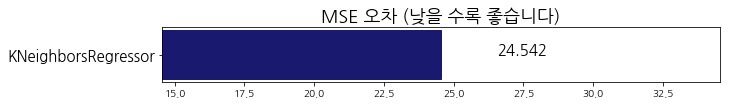

In [12]:
evaluate_prediction(knr_pred, 'KNeighborsRegressor')

아직 예측율이 그 다지 좋지 못합니다.

모델을 바꾸는 방법도 있지만, 그전에 `전처리`를 잘 해주는 것이 **중요**합니다.

아무런, 전처리를 해주지 않은 상황과 **간단한 전처리만으로 얼마나 모델성능이 개선되는지 확인**해 봅시다.

### 간단한 column 전처리

다음 3가지의 전처리를 진행하겠습니다.

1. 카테고리형 column과 수치형 column 분리
2. 카테고리형 column에 대하여 category 타입 변환
3. 변환된 column을 원핫 인코딩
4. 수치형 데이터에 대하여 StandardScaling

먼저, 각 컬럼별 데이터의 value 종류를 파악해 보겠습니다.

`value_counts()` 메소드를 활용하면 매우 쉽게 알아볼 수 있습니다.

In [13]:
col_dict = {}
for col in X.columns:
    print('column: {}, value_counts: {}'.format(col, len(X[col].value_counts())))
    col_dict[col] = len(X[col].value_counts())

column: CRIM, value_counts: 504
column: ZN, value_counts: 26
column: INDUS, value_counts: 76
column: CHAS, value_counts: 2
column: NOX, value_counts: 81
column: RM, value_counts: 446
column: AGE, value_counts: 356
column: DIS, value_counts: 412
column: RAD, value_counts: 9
column: TAX, value_counts: 66
column: PTRATIO, value_counts: 46
column: B, value_counts: 357
column: LSTAT, value_counts: 455


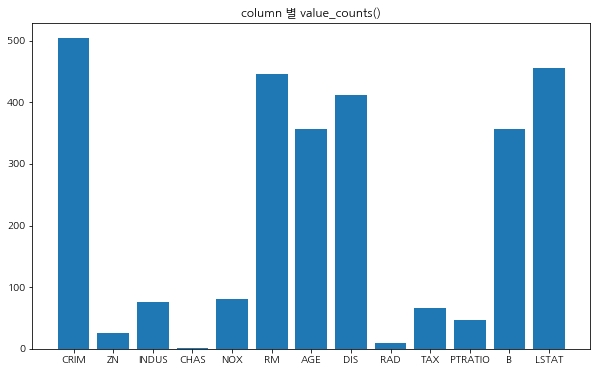

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(col_dict.keys(), col_dict.values())
plt.title('column 별 value_counts()')
plt.show()

각 column에 대하여 얼마나 다양한 종류의 데이터로 구성되어 있는지 확인해 봤습니다.

아무래도 **CHAS** 컬럼은 2개의 데이터 종류가 **RAD** 컬럼은 9개의 데이터 종류가 있습니다.

컬럼의 내용을 보면 다음과 같습니다.

* CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* RAD: 고속도로 접근성 지수

`CHAS`는 Boolean 형태이므로 우리는 수치형이 아닌 카테고리 형 컬럼이라고 단정지어도 되겠습니다.

`RAD`는 고속도로 접근성 지수인데, 굳이 수치형이 아니더라도 가령 **매우 좋음 ~ 매우 나쁨** 처럼 평점정도로 생각하고 카테고리형 데이터 컬럼으로 취급해 보도록 하겠습니다. 게다가 종류가 9개 밖에 되지 않으니깐요.

In [15]:
cat_cols = ['CHAS', 'RAD']

# 카테고리형 데이터프레임
df_category = pd.DataFrame()
for col in cat_cols:
    df_category[col] = X[col].astype('category')

# 수치형 데이터프레임
num_cols = [col for col in X.columns if col not in cat_cols]
df_numerical = X[num_cols]

In [16]:
df_category.head()

,CHAS,RAD
0,0.0,1.0
1,0.0,2.0
2,0.0,2.0
3,0.0,3.0
4,0.0,3.0


In [17]:
df_numerical.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


자, 이제 `카테고리형 컬럼`과 `수치형 컬럼`으로 분류해보았습니다.

카테고리형 데이터프레임에는 `원핫인코딩`을 진행하고,

수치형 데이터프레임에는 `StandardScaling`을 진행하겠습니다.

In [18]:
df_category = pd.get_dummies(df_category)
df_category

,CHAS_0.0,CHAS_1.0,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,1,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_numerical)
df_numerical = pd.DataFrame(scaled, columns=df_numerical.columns)

In [20]:
df_numerical

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501
5,-0.417044,-0.487722,-1.306878,-0.835284,0.207096,-0.351157,1.077737,-1.106115,0.113032,0.410571,-1.043322
6,-0.410243,0.048772,-0.476654,-0.265154,-0.388411,-0.070229,0.839244,-0.577519,-1.505237,0.426798,-0.031268
7,-0.403696,0.048772,-0.476654,-0.265154,-0.160466,0.978808,1.024638,-0.577519,-1.505237,0.441052,0.910700
8,-0.395935,0.048772,-0.476654,-0.265154,-0.931206,1.117494,1.087196,-0.577519,-1.505237,0.328448,2.421774
9,-0.400729,0.048772,-0.476654,-0.265154,-0.399808,0.616090,1.329635,-0.577519,-1.505237,0.329325,0.623344


전처리가 끝났으니, 두개의 데이터프레임을 다시 합쳐주겠습니다.

In [21]:
df = pd.concat([df_category, df_numerical], axis=1)

In [22]:
df.head()

,CHAS_0.0,CHAS_1.0,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,...,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,1,0,1,0,0,0,0,0,0,0,...,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562
1,1,0,0,1,0,0,0,0,0,0,...,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439
2,1,0,0,1,0,0,0,0,0,0,...,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727
3,1,0,0,0,1,0,0,0,0,0,...,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517
4,1,0,0,0,1,0,0,0,0,0,...,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501


In [23]:
print(df.shape)
# output
# (506, 22)

(506, 22)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=SEED)

전처리를 진행한 데이터셋으로 다시 예측을 진행합니다.

마찬가지로 KNeighborsRegressor로 예측하며, `evaluate_prediction`을 통해 시각화를 진행합니다.

이전 결과와 어떻게 달라졌는지 비교합니다.

### Q2. KNeighborsRegressor를 활용하여 예측

* `KNeighborsRegressor`를 활용하여 주택 가격을 예측합니다.
* **hyperparameter는 아무것도 지정하지 않습니다.**
* `knr_pred_2` 변수에 예측 값을 대입해주세요
* 점수는 15 보다 아래가 나와야 PASS 입니다.

                                  algorithm        mse
0                       KNeighborsRegressor  24.542374
1  KNeighborsRegressor(after preprocessing)  12.345947


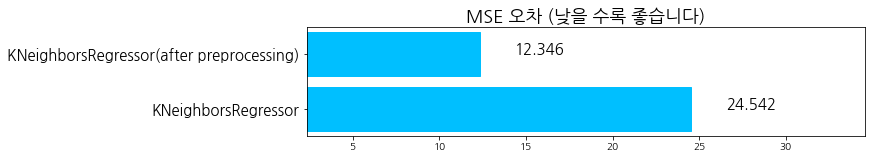

In [25]:
model2 = KNeighborsRegressor()
fit2 = model2.fit(x_train, y_train)
knr_pred2 = fit2.predict(x_test)
evaluate_prediction(knr_pred2, 'KNeighborsRegressor(after preprocessing)')

### 어때요. 모델 성능의 개선이 눈에 보이시나요?

In [26]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train, y_train)
lin_pred = lin.predict(x_test)

                                  algorithm        mse
0                       KNeighborsRegressor  24.542374
1                                    Linear  22.215878
2  KNeighborsRegressor(after preprocessing)  12.345947


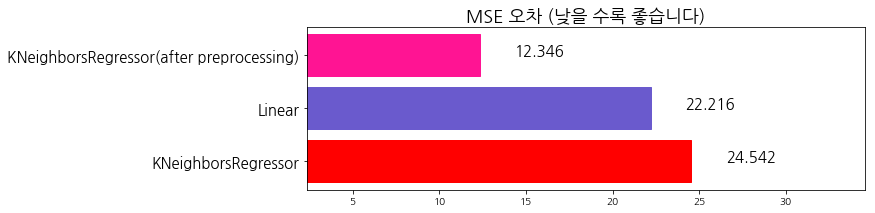

In [27]:
evaluate_prediction(lin_pred, 'Linear')

In [28]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

                                  algorithm        mse
0                                       SVR  27.072338
1                       KNeighborsRegressor  24.542374
2                                    Linear  22.215878
3  KNeighborsRegressor(after preprocessing)  12.345947


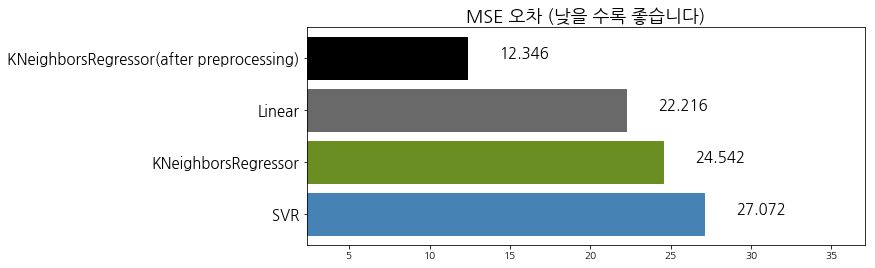

In [29]:
evaluate_prediction(svr_pred, 'SVR')

In [30]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)

                                  algorithm        mse
0                                       SVR  27.072338
1                       KNeighborsRegressor  24.542374
2                                    Linear  22.215878
3  KNeighborsRegressor(after preprocessing)  12.345947
4                     DecisionTreeRegressor  11.182829


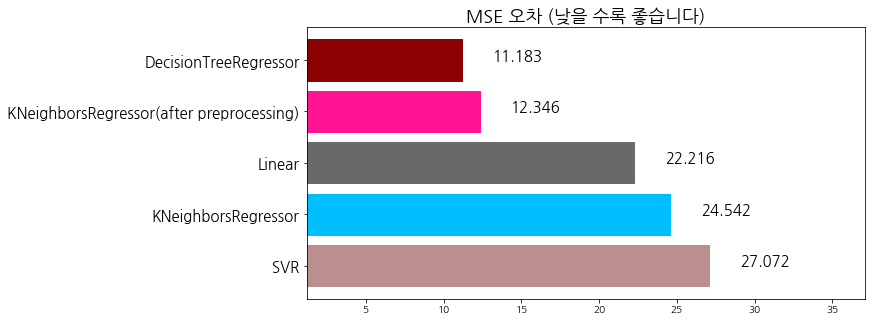

In [31]:
evaluate_prediction(dtr_pred, 'DecisionTreeRegressor')

## Bagging 앙상블

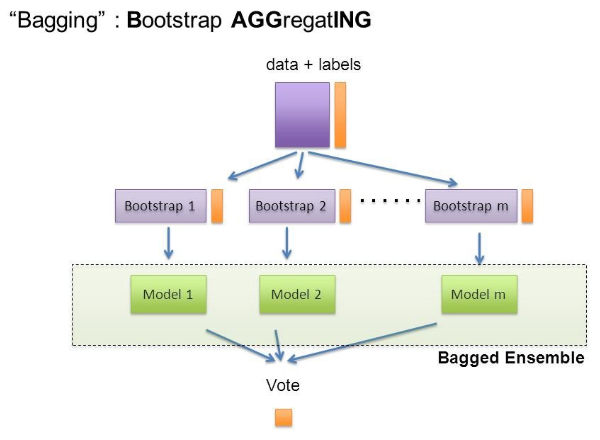

In [32]:
from IPython.display import Image

Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

**Bagging 이란**
Bagging은 Bootstrap Aggregating의 줄임말입니다.

* Bootstrap = Sample(샘플)
* Aggregating = 합산

이라고 풀이할 수 있겠습니다.

Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식을 말합니다.

**Bagging 앙상블의 장점**

Bagging 기법을 활용하며 단일 model을 활용하여 prediction (예측)을 했을 때보다 **variance(분산)** 를 줄이는 효과를 볼 수 있습니다. 

model의 학습 오류는 대부분 3가지 주요 원인으로 볼 수 있는데, 바로 분산, 노이즈, 그리고 편향(bias) 입니다. 
(물론 overfitting/underfitting 그리고 다양한 전처리 이슈들이 더욱 중요하게 다뤄지지만 그 부분들은 setting이 되었다고 가정하겠습니다)

Bagging 앙상블을 통해 **분산을 줄여 최종 결과물의 성능을 올릴 수** 있습니다.

더 많은 내용은 [앙상블 학습(ensemble learning)으로 알고리즘 성능 개선하기 - Bagging](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
에서 확인할 수 있습니다.

### Q3. BaggingRegressor를 활용해서 주택가격 예측하기

* **Base Estimator를 LinearRegression, SVR, DecisionTree, KNeighborsRegressor**를 사용
* `n_estimators`=100 으로 고정
* `random_state`=SEED 로 고정

`n_estimators`는 **의사 결정 나무의 숫자**를 의미합니다.

앙상블을 할 때 50명의 의견을 듣고 결정하는 상황과, 100명의 의견을 듣고 결정하는 상황에서 최종 판단의 결과가 다르게 나오듯, 앙상블에서도 의사 결정에 영향을 주는 `n_estimators` 파라미터의 설정이 매우 중요합니다.

단, 무조건 숫자가 크다고 좋은 것은 아닙니다. 오버피팅을 초래할 수 있습니다.

In [33]:
from sklearn.ensemble import BaggingRegressor

### Q3-1. `base_estimator`는 `LinearRegression`

예측 결과 값은 `br_pred_linear` 변수에 대입해 주세요

In [34]:
bagging_model = BaggingRegressor(base_estimator = lin,
                                 n_estimators = 100,
                                 random_state=SEED) 
linear_model2 = bagging_model.fit(x_train, y_train) 
br_pred_linear = linear_model2.predict(x_test) 

                                  algorithm        mse
0                                       SVR  27.072338
1                       KNeighborsRegressor  24.542374
2        BaggingRegressor(LinearRegression)  22.389916
3                                    Linear  22.215878
4  KNeighborsRegressor(after preprocessing)  12.345947
5                     DecisionTreeRegressor  11.182829


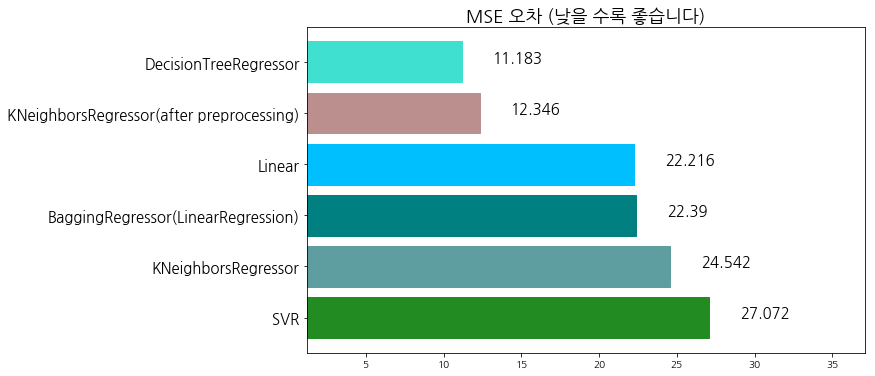

In [35]:
evaluate_prediction(br_pred_linear, 'BaggingRegressor(LinearRegression)')

### Q3-2. `base_estimator`는 `SVR`

예측 결과 값은 `br_pred_svr` 변수에 대입해 주세요

In [36]:
bagging_model = BaggingRegressor(base_estimator = svr,
                                 n_estimators = 100,
                                 random_state=SEED) 
svr_model2 = bagging_model.fit(x_train, y_train) 
br_pred_svr = svr_model2.predict(x_test) 

                                  algorithm        mse
0                     BaggingRegressor(SVR)  27.327279
1                                       SVR  27.072338
2                       KNeighborsRegressor  24.542374
3        BaggingRegressor(LinearRegression)  22.389916
4                                    Linear  22.215878
5  KNeighborsRegressor(after preprocessing)  12.345947
6                     DecisionTreeRegressor  11.182829


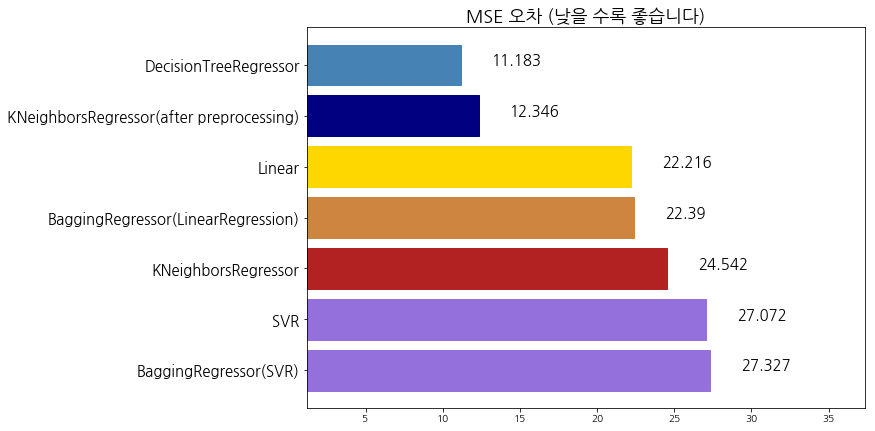

In [37]:
evaluate_prediction(br_pred_svr, 'BaggingRegressor(SVR)')

### Q3-3. `base_estimator`는 `DecisionTreeRegressor`

예측 결과 값은 `br_pred_dcr` 변수에 대입해 주세요

In [68]:
bagging_model_dtr = BaggingRegressor(base_estimator = dtr,
                                 n_estimators = 100,
                                 random_state=SEED) 
dcr_model2 = bagging_model_dtr.fit(x_train, y_train) 
br_pred_dcr = dcr_model2.predict(x_test) 

                                  algorithm        mse
0                     BaggingRegressor(SVR)  27.327279
1                                       SVR  27.072338
2                       KNeighborsRegressor  24.542374
3        BaggingRegressor(LinearRegression)  22.389916
4                                    Linear  22.215878
5  KNeighborsRegressor(after preprocessing)  12.345947
6                     DecisionTreeRegressor  11.182829
7   BaggingRegressor(DecisionTreeRegressor)   7.867061


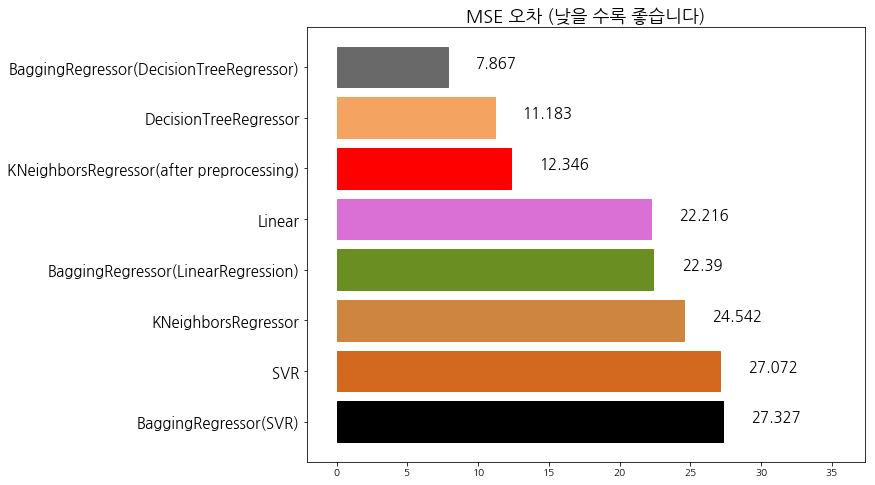

In [39]:
evaluate_prediction(br_pred_dcr, 'BaggingRegressor(DecisionTreeRegressor)')

### Q3-4. `base_estimator`는 `KNeighborsRegressor`

In [40]:
bagging_model = BaggingRegressor(base_estimator = model2,
                                 n_estimators = 100,
                                 random_state=SEED) 
knr_model2 = bagging_model.fit(x_train, y_train) 
br_pred_knr = knr_model2.predict(x_test) 

                                  algorithm        mse
0                     BaggingRegressor(SVR)  27.327279
1                                       SVR  27.072338
2                       KNeighborsRegressor  24.542374
3        BaggingRegressor(LinearRegression)  22.389916
4                                    Linear  22.215878
5  KNeighborsRegressor(after preprocessing)  12.345947
6     BaggingRegressor(KNeighborsRegressor)  12.303168
7                     DecisionTreeRegressor  11.182829
8   BaggingRegressor(DecisionTreeRegressor)   7.867061


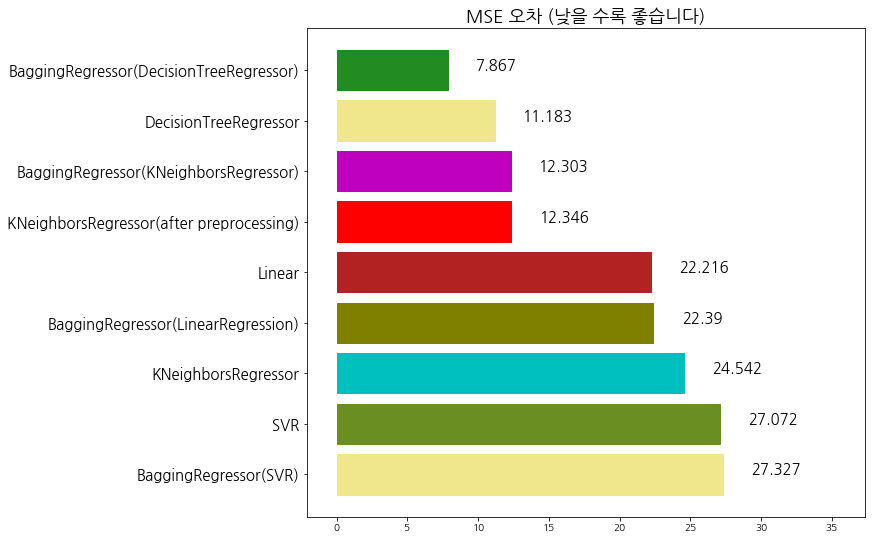

In [41]:
evaluate_prediction(br_pred_knr, 'BaggingRegressor(KNeighborsRegressor)')

### Q4. Random Forest 

* `random_state`=SEED 로 고정
* RandomForestRegressor의 `hyperparameter`값 튜닝을 통해 목표 **7.75** 이하의 MSE를 기록합니다.
* 예측한 결과를 `rfr_pred` 변수에 할당

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
random_forest_model1 = RandomForestRegressor(n_estimators = 100,
                                             random_state = SEED) 
rf_model = random_forest_model1.fit(x_train, y_train)
rfr_pred = rf_model.predict(x_test)

                                  algorithm        mse
0                     BaggingRegressor(SVR)  27.327279
1                                       SVR  27.072338
2                       KNeighborsRegressor  24.542374
3        BaggingRegressor(LinearRegression)  22.389916
4                                    Linear  22.215878
5  KNeighborsRegressor(after preprocessing)  12.345947
6     BaggingRegressor(KNeighborsRegressor)  12.303168
7                     DecisionTreeRegressor  11.182829
8   BaggingRegressor(DecisionTreeRegressor)   7.867061
9                     RandomForestRegressor   7.660141


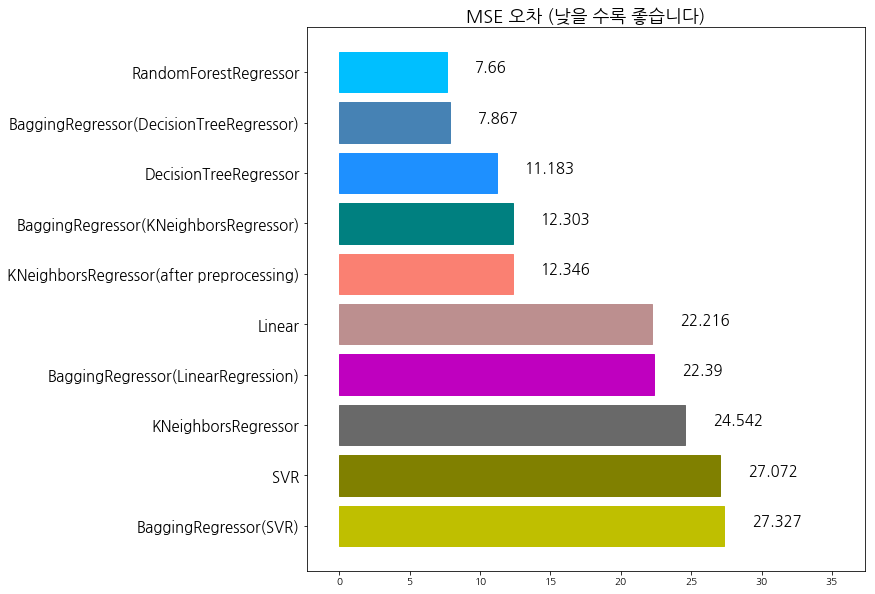

In [44]:
evaluate_prediction(rfr_pred, 'RandomForestRegressor')

## Boosting 앙상블

Boosting 알고리즘 역시 앙상블 학습 (ensemble learning)이며, 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 **잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식** 입니다.

다른 앙상블 기법과 가장 다른 점중 하나는 바로 순차적인 학습을 하며 weight를 부여해서 오차를 보완해 나간다는 점인데요. *순차적이기 때문에 병렬 처리에 어려움이 있고, 그렇기 때문에 다른 앙상블 대비 학습 시간이 오래걸린다는 단점*이 있습니다.

더 많은 내용은 [앙상블 학습(ensemble learning)으로 알고리즘 성능 개선하기 - Boosting](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)
에서 확인할 수 있습니다.

### Q5. AdaBoostRegressor

* AdaBoostRegressor를 활용하여 예측합니다.
* `n_estimators`=100으로 고정합니다.
* `base_estimators`를 지정합니다.
* **목표점수**는 **MSE 7.7** 이하입니다.
* `abr_pred`에 예측 값을 할당합니다.

In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [47]:
model8 = AdaBoostRegressor(base_estimator = dtr,
                          n_estimators=100,
                          random_state=SEED)
fit8 = model8.fit(x_train, y_train)

abr_pred = fit8.predict(x_test)

                                   algorithm        mse
0                      BaggingRegressor(SVR)  27.327279
1                                        SVR  27.072338
2                        KNeighborsRegressor  24.542374
3         BaggingRegressor(LinearRegression)  22.389916
4                                     Linear  22.215878
5   KNeighborsRegressor(after preprocessing)  12.345947
6      BaggingRegressor(KNeighborsRegressor)  12.303168
7                      DecisionTreeRegressor  11.182829
8    BaggingRegressor(DecisionTreeRegressor)   7.867061
9                          AdaBoostRegressor   7.700329
10                     RandomForestRegressor   7.660141


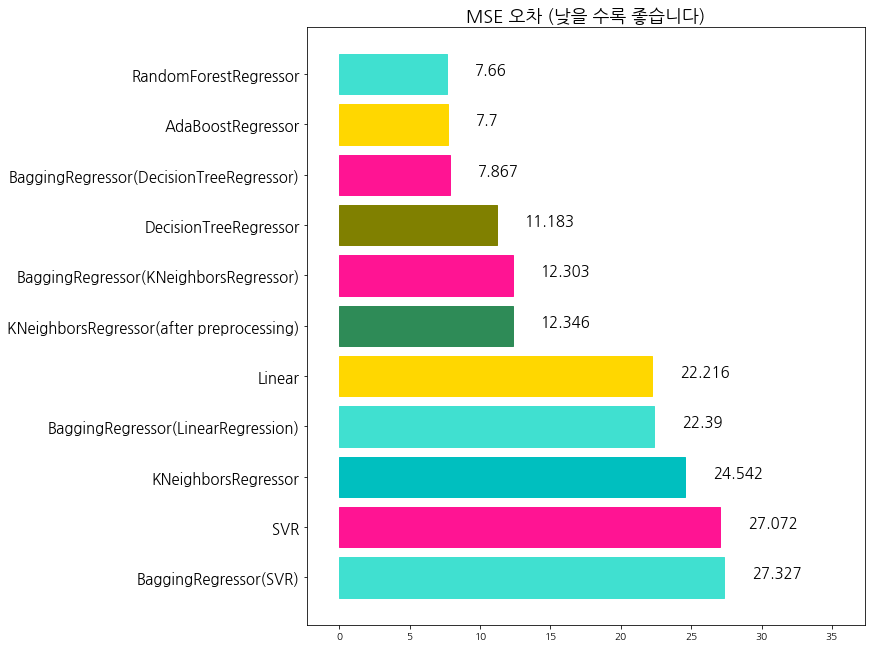

In [48]:
evaluate_prediction(abr_pred, 'AdaBoostRegressor')

### Q6. GradientBoostingRegressor

* `GradientBoostingRegressor`를 활용하여 주택가격을 예측합니다.
* `n_estimators`, `learning_rate`, `subsample` 파라미터를 조절하여 **목표점수7.0 이하**에 도전합니다.
* 예측 후 `gbr_pred` 변수에 예측 값을 할당 합니다.

`learning_rate`는 학습 속도를 조절합니다. 기본값은 1.0입니다.

`subsample`은 샘플데이터 활용 비율입니다. 기본값은 1이며, 1이면 모두 사용, 0.3이면 30%만 사용하겠다는 의미입니다.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
model9 = GradientBoostingRegressor(n_estimators=200,
                                   subsample=0.3,
                                  random_state=SEED)
fit9 = model9.fit(x_train, y_train)
gbr_pred = fit9.predict(x_test)

                                   algorithm        mse
0                      BaggingRegressor(SVR)  27.327279
1                                        SVR  27.072338
2                        KNeighborsRegressor  24.542374
3         BaggingRegressor(LinearRegression)  22.389916
4                                     Linear  22.215878
5   KNeighborsRegressor(after preprocessing)  12.345947
6      BaggingRegressor(KNeighborsRegressor)  12.303168
7                      DecisionTreeRegressor  11.182829
8    BaggingRegressor(DecisionTreeRegressor)   7.867061
9                          AdaBoostRegressor   7.700329
10                     RandomForestRegressor   7.660141
11                 GradientBoostingRegressor   6.762001


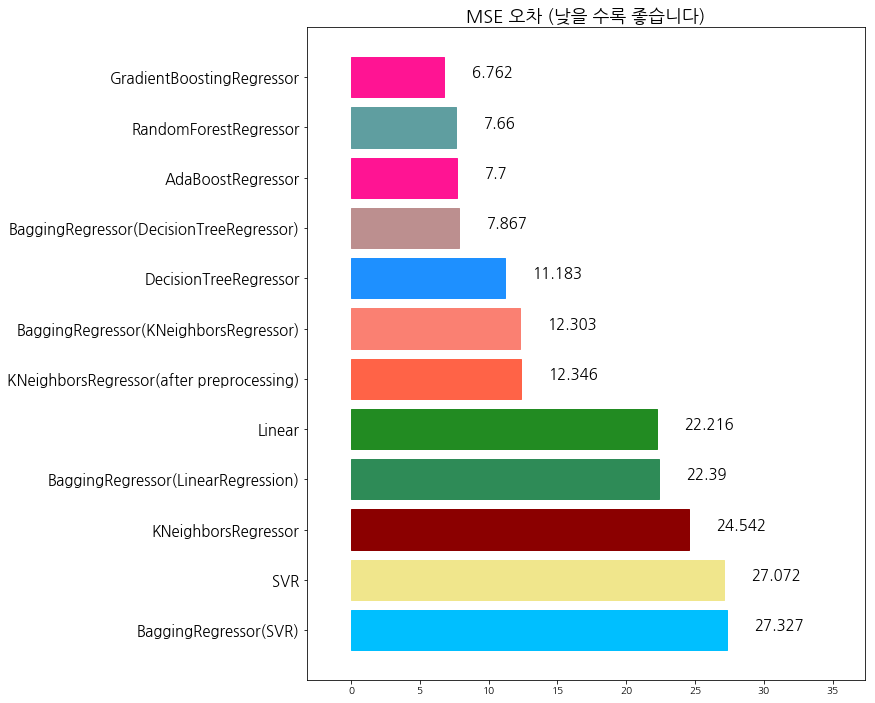

In [66]:
evaluate_prediction(gbr_pred, 'GradientBoostingRegressor')

## Voting 앙상블

Voting은 단어 뜻 그대로 투표를 통해 결정하는 방식입니다. 

Voting은 Bagging과 투표방식이라는 점에서 유사하지만, 다음과 같은 큰 차이점이 있습니다.

* Voting은 다른 알고리즘 model을 조합해서 사용합니다.
* Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용합니다.



더 많은 내용은 [앙상블 학습(ensemble learning)으로 알고리즘 성능 개선하기 - Voting](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
에서 확인할 수 있습니다.

### Q7. VotingRegressor

* `VotingRegressor`를 활용하여 주택가격을 예측합니다.
* `weights` 파라미터에는 각기 다른 weight를 적용하여, 베스트 조합을 찾습니다.
* 현재까지 상위 4~5개 모델을 섞어 `estimators`로 사용합니다.
* 목표점수는 **6.8**이하입니다.

In [67]:
from sklearn.ensemble import VotingRegressor

                                   algorithm        mse
0                      BaggingRegressor(SVR)  27.327279
1                                        SVR  27.072338
2                        KNeighborsRegressor  24.542374
3         BaggingRegressor(LinearRegression)  22.389916
4                                     Linear  22.215878
5   KNeighborsRegressor(after preprocessing)  12.345947
6      BaggingRegressor(KNeighborsRegressor)  12.303168
7                      DecisionTreeRegressor  11.182829
8    BaggingRegressor(DecisionTreeRegressor)   7.867061
9                          AdaBoostRegressor   7.700329
10                     RandomForestRegressor   7.660141
11                 GradientBoostingRegressor   6.762001
12                           VotingRegressor   6.457082


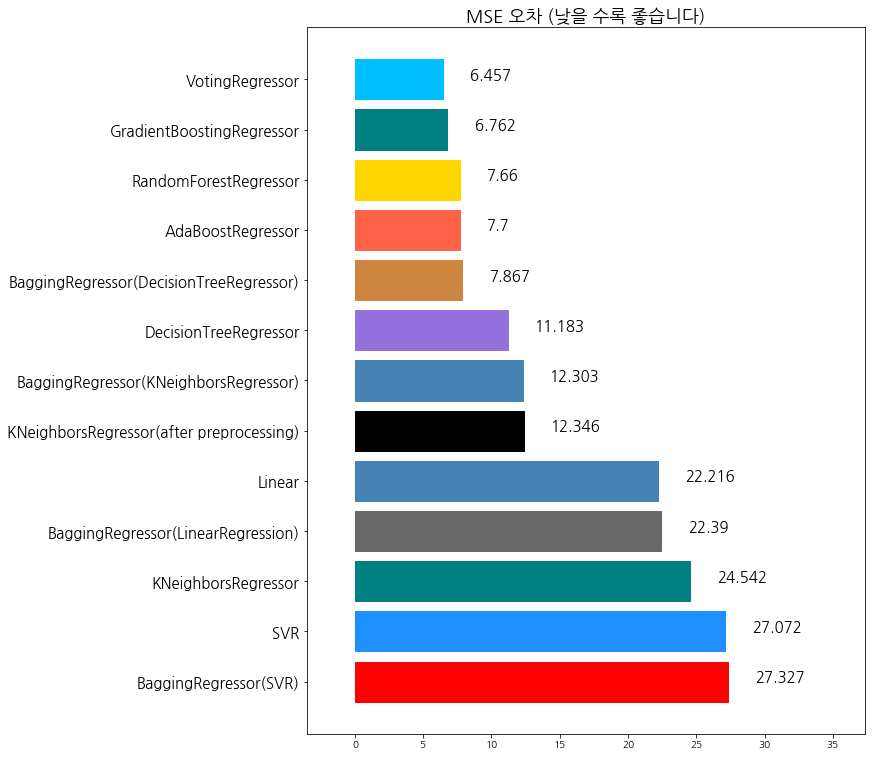

In [70]:
estimators = [
    ('gbr', model9),
    ('rfr', random_forest_model1),
    ('dtr', bagging_model_dtr),
    ('ada', model8)
]

# 모델 학습
v_model = VotingRegressor(estimators=estimators)
v_model.fit(x_train, y_train)
vr_pred = v_model.predict(x_test)

# 모델 평가
evaluate_prediction(vr_pred, 'VotingRegressor')

## Stacking 모델 쌓기

Stacking 앙상블은 대회에서 최고 점수에 도달하기 위하여 종종 사용되는 앙상블 기법입니다.

주요 특징은 **개별 모델이 예측한 데이터를 토대로 다시 학습을 한다**는 점입니다.

개별 모델이 예측한 데이터를 `final_estimator`가 최종 학습을 한 뒤 결과를 최종 예측합니다.

In [71]:
import sklearn

sklearn.__version__

'0.22.1'

**StackingRegressor**는 0.22 버전부터 추가되었습니다.

In [72]:
from sklearn.ensemble import StackingRegressor

In [74]:
estimators = [
    ('abr', model8),
    ('br', bagging_model_dtr),
    ('rfr', random_forest_model1),
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=model9, n_jobs=-1)

In [75]:
reg.fit(x_train, y_train)
stack_prediction = reg.predict(x_test)

                                   algorithm        mse
0                      BaggingRegressor(SVR)  27.327279
1                                        SVR  27.072338
2                        KNeighborsRegressor  24.542374
3         BaggingRegressor(LinearRegression)  22.389916
4                                     Linear  22.215878
5   KNeighborsRegressor(after preprocessing)  12.345947
6      BaggingRegressor(KNeighborsRegressor)  12.303168
7                          StackingRegressor  11.552350
8                      DecisionTreeRegressor  11.182829
9    BaggingRegressor(DecisionTreeRegressor)   7.867061
10                         AdaBoostRegressor   7.700329
11                     RandomForestRegressor   7.660141
12                 GradientBoostingRegressor   6.762001
13                           VotingRegressor   6.457082


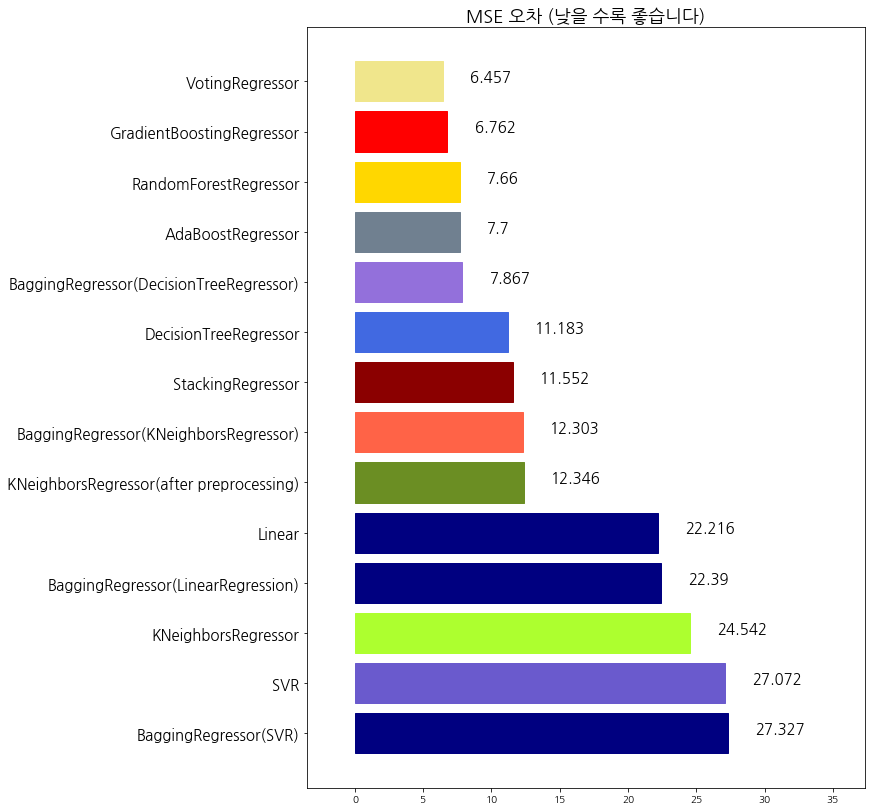

In [76]:
evaluate_prediction(stack_prediction, 'StackingRegressor')

## Weighted Blending 모델 혼합하기

### Q8: Blending을 활용하여 최고 점수를 기록해 보세요

- weighted blending 기법은 말그대로 우리가 예측한 가격 값에 대하여, 일정한 비율 (weight)를 곱하여 최종 예측 값을 산출해 냅니다.
- weight의 총합은 1.0이 나와야 합니다.
- 일반적으로 좋은 성능이 나온 모델에 weight를 많이 부여합니다.

In [83]:
blend = gbr_pred * 0.5  + vr_pred * 0.3 + rfr_pred * 0.1 + abr_pred * 0.1

### Q9. 최종 과제: 각 종 모델을 앙상블하여 최고 점수에 도달하기

**목표**: MSE 점수를 **6.3점 이하**로 만들어 보세요

다양한 모델의 활용, voting, boosting, bagging, stacking, blending 등의 기법을 활용하여 최고 점수에 도달해 보세요!

**evaluation predict** 기준으로 **6.3점 이하**에 도전해 보세요.

                                   algorithm        mse
0                      BaggingRegressor(SVR)  27.327279
1                                        SVR  27.072338
2                        KNeighborsRegressor  24.542374
3         BaggingRegressor(LinearRegression)  22.389916
4                                     Linear  22.215878
5   KNeighborsRegressor(after preprocessing)  12.345947
6      BaggingRegressor(KNeighborsRegressor)  12.303168
7                          StackingRegressor  11.552350
8                      DecisionTreeRegressor  11.182829
9    BaggingRegressor(DecisionTreeRegressor)   7.867061
10                         AdaBoostRegressor   7.700329
11                     RandomForestRegressor   7.660141
12                 GradientBoostingRegressor   6.762001
13                           VotingRegressor   6.457082
14                                  Blending   6.027654


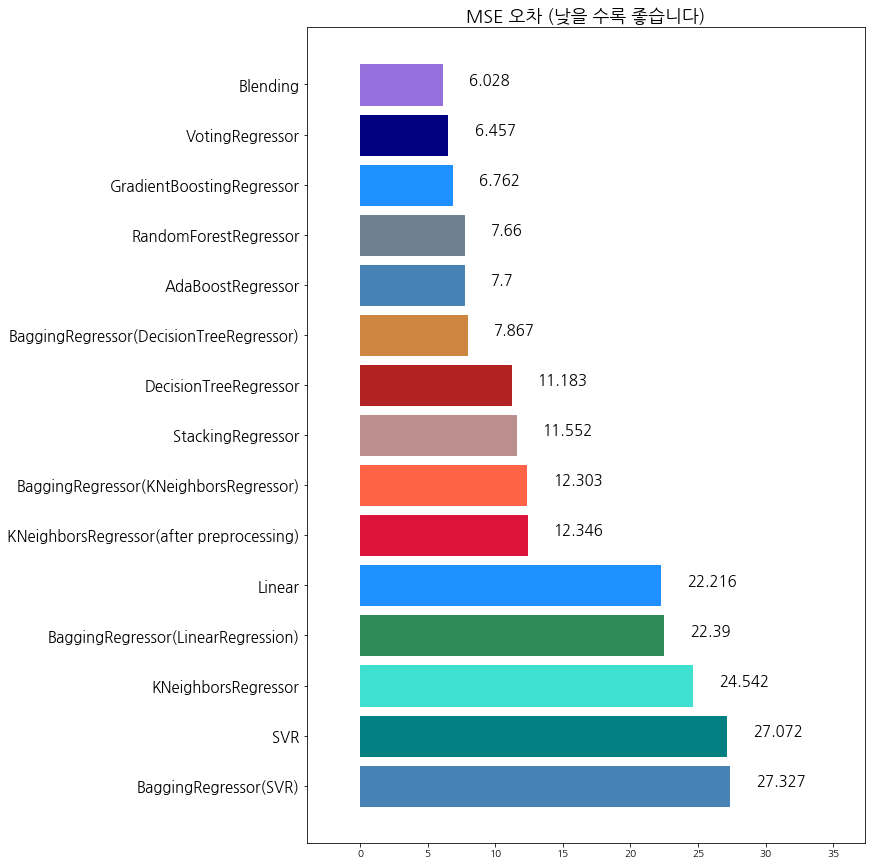

In [84]:
evaluate_prediction(blend, 'Blending')